###   Data Preparation

As a data scientist for BestDeal retailer, you
have been tasked with improving their revenue and the effectiveness of the
marketing campaign of their electronic products. The given dataset has
10,000 records for the purchases of their customers and is used to predict
customers shopping patterns and to provide answers for ad-hoc queries.
The dataset DirtyData4BestDeal10000.csv is drawn from its database of
customers.

In [1]:
import pandas as pd  # panda's nickname is pd

import numpy as np  # numpy as np

from pandas import DataFrame, Series     # for convenience

import sqlalchemy

from sqlalchemy import create_engine

from sqlalchemy import inspect

### Lets ead the dirtydata4bestdeal CSV and load into a dataframe object

In [2]:
dirtydata4bestdeal=pd.read_csv('DirtyData4BestDeal10000.csv', delimiter=' *, *', engine='python')

In [3]:

# Do you see NaN values below?

dirtydata4bestdeal.head()

,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,iPod,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,30134.0,35.0,1,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1
1,62791.0,43.0,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1
2,60611.0,23.0,1,NaN,0.0,1.0,0.0,NaN,1.0,1.0,...,0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,1.0,1
3,60616.0,56.0,0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
4,30303.0,25.0,1,NaN,0.0,NaN,1.0,1.0,1.0,0.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,10.0,0


### Lets use boxplot to visualize the data and get an idea if there are dirty/messy/invalid data

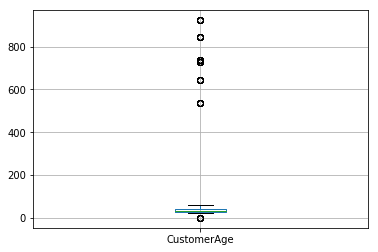

In [5]:
dirtydata4bestdeal.boxplot(column='CustomerAge')


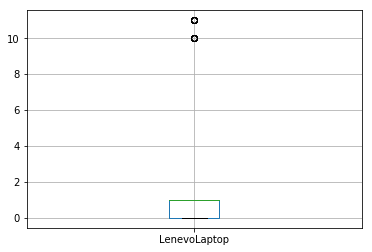

In [6]:
dirtydata4bestdeal.boxplot(column='LenevoLaptop')

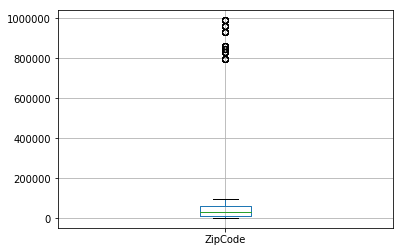

In [7]:
dirtydata4bestdeal.boxplot(column='ZipCode')


### Lets clean the dirty/messy data in the dirtydata4bestdeal dataframe object

In [8]:
# Drop the NaN values 

cleandata4bestdeal=dirtydata4bestdeal.dropna()
cleandata4bestdeal.head()

# Do you see NaN values dropped below?


,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,iPod,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,30134.0,35.0,1,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1
1,62791.0,43.0,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1
3,60616.0,56.0,0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
5,2108.0,55.0,1,1.0,1.0,1.0,10.0,0.0,0.0,0.0,...,1,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0
6,90033.0,44.0,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1


In [9]:
cleandata4bestdeal = cleandata4bestdeal.drop(cleandata4bestdeal[(cleandata4bestdeal.CustomerAge < 16) | (cleandata4bestdeal.CustomerAge > 80)
 | (cleandata4bestdeal.ZipCode > 99999)
 | (cleandata4bestdeal.SamsungTV46LED > 1) 
 | (cleandata4bestdeal.SonyTV42LED  > 1) 
 | (cleandata4bestdeal.XBOX360  > 1) 
 | (cleandata4bestdeal.DellLaptop > 1) 
 | (cleandata4bestdeal.BoseSoundSystem > 1) 
 | (cleandata4bestdeal.BoseHeadSet > 1)
 | (cleandata4bestdeal.SonyHeadSet > 1)
 | (cleandata4bestdeal.iPod > 1)
 | (cleandata4bestdeal.iPhone > 1)
 | (cleandata4bestdeal.Panasonic50LED > 1)
 | (cleandata4bestdeal.SonyPS4 > 1)
 | (cleandata4bestdeal.WiiU > 1)
 | (cleandata4bestdeal.WDexternalHD > 1)
 | (cleandata4bestdeal.SamsungTV55LED > 1)
 | (cleandata4bestdeal.SonyTV60LED > 1)
 | (cleandata4bestdeal.SandiskMemoryCard > 1)
 | (cleandata4bestdeal.SonySoundSystem > 1)
 | (cleandata4bestdeal.SonyCamera > 1)
 | (cleandata4bestdeal.PanasonicCamera > 1)
 | (cleandata4bestdeal.HPPrinter > 1)
 | (cleandata4bestdeal.SonyDVDplayer > 1)
 | (cleandata4bestdeal.ToshibaDVDplayer > 1)
 | (cleandata4bestdeal.GalaxyTablet > 1)
 | (cleandata4bestdeal.SurfaceTablet > 1)
 | (cleandata4bestdeal.HPLaptop > 1)
 | (cleandata4bestdeal.HDMICable > 1)
 | (cleandata4bestdeal.SpeakerCable > 1)
 | (cleandata4bestdeal.CallOfDutyGame > 1)
 | (cleandata4bestdeal.GrandTheftAutoGame > 1)
 | (cleandata4bestdeal.ASUSLaptop > 1)
 | (cleandata4bestdeal.LenevoLaptop > 1)
 | (cleandata4bestdeal.TVStandWallMount > 1)].index)
 

### Lets store the cleaned data into the Database

In [10]:
engine=create_engine('sqlite:///bestdeal.db')

In [11]:
cleandata4bestdeal.to_sql('trans4cust', engine)

** Sanity Test: Did it create the table in bestdeal.db?  Check!!**

In [12]:
insp=inspect(engine)

In [13]:
 insp.get_table_names()

['trans4cust']

In [14]:
pd.read_sql_table('trans4cust', engine).columns

Index(['index', 'ZipCode', 'CustomerAge', 'SamsungTV46LED', 'SonyTV42LED',
       'XBOX360', 'DellLaptop', 'BoseSoundSystem', 'BoseHeadSet',
       'SonyHeadSet', 'iPod', 'iPhone', 'Panasonic50LED', 'SonyPS4', 'WiiU',
       'WDexternalHD', 'SamsungTV55LED', 'SonyTV60LED', 'SandiskMemoryCard',
       'SonySoundSystem', 'SonyCamera', 'PanasonicCamera', 'HPPrinter',
       'SonyDVDplayer', 'ToshibaDVDplayer', 'GalaxyTablet', 'SurfaceTablet',
       'HPLaptop', 'HDMICable', 'SpeakerCable', 'CallOfDutyGame',
       'GrandTheftAutoGame', 'ASUSLaptop', 'LenevoLaptop', 'TVStandWallMount'],
      dtype='object')

### Now we are ready to query the Database

#### Query example #1: get the transactions for the customers in zipCode 60616

In [15]:
resultsForBestDealCustTrans=pd.read_sql_query("SELECT * FROM trans4cust WHERE ZipCode='60616'", engine)

In [16]:
resultsForBestDealCustTrans.head()

,index,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,3,60616.0,56.0,0,1.0,1.0,1.0,0.0,0.0,1.0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
1,16,60616.0,43.0,0,1.0,1.0,0.0,1.0,0.0,1.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1
2,18,60616.0,54.0,1,0.0,0.0,1.0,0.0,1.0,1.0,...,0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1
3,23,60616.0,43.0,1,1.0,1.0,0.0,1.0,1.0,1.0,...,1,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1
4,34,60616.0,31.0,0,1.0,1.0,1.0,0.0,0.0,1.0,...,1,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1


#### Query example #2: get the transactions for ALL customers

In [17]:
resultsForBestDealCustTrans=pd.read_sql_query("SELECT * FROM trans4cust", engine)

In [18]:
resultsForBestDealCustTrans.head()

,index,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,0,30134.0,35.0,1,1.0,1.0,0.0,0.0,1.0,1.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1
1,1,62791.0,43.0,0,1.0,0.0,0.0,1.0,0.0,1.0,...,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1
2,3,60616.0,56.0,0,1.0,1.0,1.0,0.0,0.0,1.0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
3,6,90033.0,44.0,1,1.0,1.0,1.0,0.0,0.0,0.0,...,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1
4,9,2109.0,37.0,0,1.0,1.0,0.0,1.0,0.0,1.0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0


#### Query example #3: get the number of customers in every ZipCode sorted by ZipCode

In [19]:
resultsForBestDealCustTrans=pd.read_sql_query("SELECT ZipCode , COUNT(*) as 'num_customers' FROM trans4cust GROUP BY ZipCode  ORDER BY ZipCode", engine)

In [20]:
resultsForBestDealCustTrans

,ZipCode,num_customers
0,2108.0,613
1,2109.0,917
2,2110.0,224
3,10065.0,750
4,30134.0,1133
5,30303.0,985
6,33129.0,531
7,33130.0,280
8,44114.0,510
9,60532.0,243


#### Query example #4: get the number of customers for  every Age Group in ZipCode 60616 sorted by CustomerAge

In [21]:
resultsForBestDealCustTrans=pd.read_sql_query(
"SELECT CustomerAge , COUNT(*) as 'num_customers' FROM trans4cust WHERE ZipCode=60616 GROUP BY CustomerAge  ORDER BY CustomerAge", engine)

In [22]:
resultsForBestDealCustTrans

,CustomerAge,num_customers
0,21.0,56
1,22.0,32
2,23.0,40
3,25.0,88
4,26.0,48
5,27.0,32
6,28.0,32
7,29.0,56
8,31.0,16
9,32.0,16


#### Query example #5: Plot in a stacked-bar figure the number of customers who bought SonyTV60LED and/or BoseSoundSystem in  every zipcode that has more than 400 customers who bought these two products(either bought one of these products or the two products)

In [23]:
SonyTV60LEDCustTrans=pd.read_sql_query(
"SELECT ZipCode , COUNT(*) as 'num_customers' FROM trans4cust WHERE SonyTV60LED=1  GROUP BY ZipCode HAVING COUNT(*) > 400", engine)

BoseSoundSystemCustTrans=pd.read_sql_query(
"SELECT ZipCode , COUNT(*) as 'num_customers' FROM trans4cust WHERE BoseSoundSystem=1 GROUP BY ZipCode HAVING COUNT(*) > 400", engine)

In [24]:
SonyTV60LEDCustTrans

,ZipCode,num_customers
0,2108.0,402
1,2109.0,578
2,10065.0,439
3,30134.0,757
4,30303.0,517
5,60616.0,689


In [25]:
BoseSoundSystemCustTrans

,ZipCode,num_customers
0,2109.0,424
1,30134.0,799
2,30303.0,464
3,60616.0,466
4,90033.0,404


In [26]:
SonyTV60LEDCustTrans.ZipCode


0     2108.0
1     2109.0
2    10065.0
3    30134.0
4    30303.0
5    60616.0
Name: ZipCode, dtype: float64

In [27]:
import numpy

#   There are zipcodes that Sony got bought but not Bose 
#   but there are also zipcodes that Bose got bought but not Sony
#
#   AND we need to use stacked-bar graph and we have a potentially asymmetrical set  of zipcode values
#   So, we need to do somework to create the symmteric set of zipcode values for Sony and Bose


sonyZipCodeTuples=tuple(SonyTV60LEDCustTrans.ZipCode.astype(numpy.int))
sony_num_customersTuples=tuple(SonyTV60LEDCustTrans.num_customers.astype(numpy.int))

boseZipCodeTuples=tuple(BoseSoundSystemCustTrans.ZipCode.astype(numpy.int))
bose_num_customersTuples=tuple(BoseSoundSystemCustTrans.num_customers.astype(numpy.int))




sony_dict = dict(zip(sonyZipCodeTuples, sony_num_customersTuples))
bose_dict = dict(zip(boseZipCodeTuples, bose_num_customersTuples))

for key in bose_dict.keys():
    if ((key in sony_dict.keys()) == False): sony_dict[key]=0

        
for key in sony_dict.keys():
    if ((key in bose_dict.keys()) == False): bose_dict[key]=0


        
bose_zip= sorted(bose_dict.keys())

sony_zip= sorted(sony_dict.keys())

bose_zip_tuple=tuple(bose_zip)

sony_zip_tuple=tuple(sony_zip)

bose_customer_list=[]

for bose in bose_zip_tuple:
    bose_customer_list.append(bose_dict[bose])

sony_customer_list=[]

for sony in sony_zip_tuple:
    sony_customer_list.append(sony_dict[sony])

bose_customer_tuple=tuple(bose_customer_list)
sony_customer_tuple=tuple(sony_customer_list)


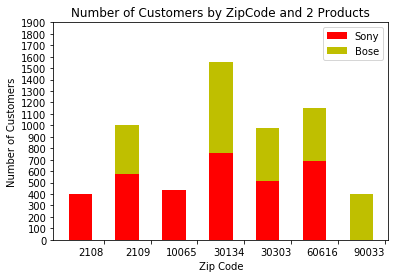

In [28]:
# See docs for bar_stack at the URL
# http://matplotlib.org/examples/pylab_examples/bar_stacked.html

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 


ind = np.arange(len(sony_customer_tuple))    


# the width of the bars: can also be len(x) sequence
width = .5


p1 = plt.bar(ind, sony_customer_tuple, width,  color='r')
p2 = plt.bar(ind, bose_customer_tuple, width, color='y', bottom=sony_customer_tuple)


plt.ylabel('Number of Customers')
plt.xlabel('Zip Code')

plt.title('Number of Customers by ZipCode and 2 Products')

plt.xticks(ind + width, sony_zip_tuple, horizontalalignment='right')

plt.yticks(np.arange(0, 2000, 100))
plt.legend((p1[0], p2[0]), ('Sony', 'Bose'))

plt.show()

# Requirements :
1. (Use SQL/SQlite): get the number of customers who bought DellLaptop and HPPrinter for every Age group sorted by CustomerAge
2. (Use SQL/SQlite): Get the list of ZipCodes where no customer bought XBOX360 (this query means NOT even a single csutomer in that zip code bought XBOX360)
3. (Use SQL/SQlite/Matplotlib): Plot in a stacked-bar figure the number of customers who bought HPLaptop and/or HPPrinter but did NOT buy  WDexternalHD for  every CustomerAge group that has more than 100 customers who bought these two products(either bought one of these products or the two products but didn't buy WDexternalHD)


In [29]:
#requirement 1
resultsForBestDealCustTrans=pd.read_sql_query(
"SELECT CustomerAge , COUNT(*) as 'num_customers' FROM trans4cust WHERE DellLaptop=1 AND HPPrinter=1 GROUP BY CustomerAge  ORDER BY CustomerAge", engine)

In [30]:
resultsForBestDealCustTrans

,CustomerAge,num_customers
0,21.0,201
1,22.0,203
2,23.0,304
3,25.0,64
4,26.0,183
5,27.0,272
6,28.0,56
7,29.0,143
8,31.0,194
9,32.0,184


In [31]:
#requirement 2
resultsForBestDealCustTrans=pd.read_sql_query("SELECT ZipCode , COUNT(*) as 'num_customers' FROM trans4cust WHERE XBOX360=0 GROUP BY ZipCode  ORDER BY ZipCode", engine)

In [32]:
resultsForBestDealCustTrans

,ZipCode,num_customers
0,2108.0,49
1,2109.0,209
2,2110.0,96
3,10065.0,164
4,30134.0,248
5,30303.0,220
6,33129.0,67
7,33130.0,40
8,44114.0,81
9,60532.0,32


In [33]:
#requirement 3
HPLaptop_Trans=pd.read_sql_query(
"SELECT CustomerAge , COUNT(*) as 'num_customers' FROM trans4cust WHERE HPLaptop=1 AND WDexternalHD=0 GROUP BY CustomerAge HAVING COUNT(*) > 100", engine)

HPPrinter_Trans=pd.read_sql_query(
"SELECT CustomerAge , COUNT(*) as 'num_customers' FROM trans4cust WHERE HPPrinter=1 AND WDexternalHD=0 GROUP BY CustomerAge HAVING COUNT(*) > 100", engine)


In [34]:
HPLaptop_Trans

,CustomerAge,num_customers
0,21.0,192
1,22.0,203
2,23.0,437
3,25.0,147
4,26.0,205
5,27.0,307
6,28.0,126
7,29.0,290
8,31.0,196
9,32.0,176


In [35]:
HPPrinter_Trans

,CustomerAge,num_customers
0,21.0,192
1,22.0,193
2,23.0,437
3,25.0,147
4,26.0,205
5,27.0,288
6,28.0,126
7,29.0,290
8,31.0,196
9,32.0,176


In [36]:

laptopAgeTuples=tuple(HPLaptop_Trans.CustomerAge.astype(numpy.int))
laptop_num_customersTuples=tuple(HPLaptop_Trans.num_customers.astype(numpy.int))

printerAgeTuples=tuple(HPPrinter_Trans.CustomerAge.astype(numpy.int))
printer_num_customersTuples=tuple(HPPrinter_Trans.num_customers.astype(numpy.int))




laptop_dict = dict(zip(laptopAgeTuples, laptop_num_customersTuples))
printer_dict = dict(zip(printerAgeTuples, printer_num_customersTuples))

for key in printer_dict.keys():
    if ((key in laptop_dict.keys()) == False): laptop_dict[key]=0

        
for key in laptop_dict.keys():
    if ((key in printer_dict.keys()) == False): printer_dict[key]=0


        
printer_age= sorted(printer_dict.keys())

laptop_age= sorted(laptop_dict.keys())

printer_age_tuple=tuple(printer_age)

laptop_age_tuple=tuple(laptop_age)

printer_customer_list=[]

for printer in printer_age_tuple:
    printer_customer_list.append(printer_dict[printer])

laptop_customer_list=[]

for laptop in laptop_age_tuple:
    laptop_customer_list.append(laptop_dict[laptop])

printer_customer_tuple=tuple(printer_customer_list)
laptop_customer_tuple=tuple(laptop_customer_list)

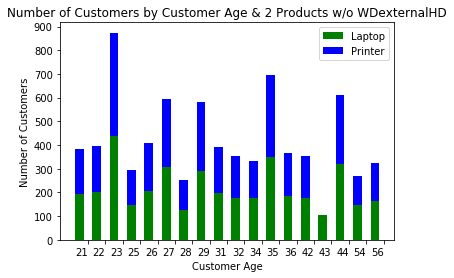

In [42]:
ind = np.arange(len(laptop_customer_tuple))    


# the width of the bars: can also be len(x) sequence
width = .5


p1 = plt.bar(ind, laptop_customer_tuple, width,  color='g')
p2 = plt.bar(ind, printer_customer_tuple, width, color='b', bottom=laptop_customer_tuple)


plt.ylabel('Number of Customers')
plt.xlabel('Customer Age')

plt.title('Number of Customers by Customer Age & 2 Products w/o WDexternalHD')

plt.xticks(ind + width, laptop_age_tuple, horizontalalignment='right')

plt.yticks(np.arange(0, 1000, 100))
plt.legend((p1[0], p2[0]), ('Laptop', 'Printer'))


plt.show()